<a href="https://colab.research.google.com/github/clirlab/chagas_classification/blob/main/VGGNet%2BPCA%2BSVM-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from keras.regularizers import l2
from datetime import datetime 


# extract folder of chages disease images and non chagas disease images
## We should have two folders ( Chagas and Non-Chagas )
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
!unzip "/content/drive/MyDrive/Chagas-preet/ChagasTraining.zip" -d "/content/"
!unzip "/content/drive/MyDrive/Chagas-preet/ChagasTest.zip" -d "/content/"
!unzip "/content/drive/MyDrive/Chagas-preet/ChagasValidation.zip" -d "/content/"
!unzip "/content/drive/MyDrive/Chagas-preet/Non-ChagasData_Selected.zip" -d "/content/"

Archive:  /content/drive/MyDrive/Chagas-preet/ChagasTraining.zip
   creating: /content/training-20210525T143718Z-001/
   creating: /content/training-20210525T143718Z-001/New folder/
   creating: /content/training-20210525T143718Z-001/training/
   creating: /content/training-20210525T143718Z-001/training/images/
  inflating: /content/training-20210525T143718Z-001/training/images/i800.png  
  inflating: /content/training-20210525T143718Z-001/training/images/i800.xml  
  inflating: /content/training-20210525T143718Z-001/training/images/i801.png  
  inflating: /content/training-20210525T143718Z-001/training/images/i801.xml  
  inflating: /content/training-20210525T143718Z-001/training/images/i802.png  
  inflating: /content/training-20210525T143718Z-001/training/images/i802.xml  
  inflating: /content/training-20210525T143718Z-001/training/images/i803.png  
  inflating: /content/training-20210525T143718Z-001/training/images/i803.xml  
  inflating: /content/training-20210525T143718Z-001/tra

In [10]:
import shutil
shutil.rmtree('/content/training-20210525T143718Z-001')

In [ ]:
import os 
import seaborn as sns
from keras.applications.vgg16 import VGG16
training_dir =  "../input/training/training"
test_dir =      "../input/testdata/Test"
validation_dir= "../input/validation/Validation"

training_dir_images = os.path.join(training_dir , "images")
test_dir_images = os.path.join(test_dir , "images")
validation_dir_images = os.path.join(validation_dir , "images")


Training_Non_ChagasFiles = [ "i_0450,i_0389,i_0392 ,i_0395 , i_0440 ,i_0429 , i_0406 , i_0398 , i_0369 , i_0374, i_0348, i_0339,  i_0337 , i_0389 ,i_0334, i_0324 ,i_0279, i_0280, i_0281 , i_0263 , i_0264 , i_0254 , i_0253 , i_0245 , i_0240 , i_0238 , i_0235 , i_0226 , i_0201, i_0184, i_0156, i_0150, i_0148 , i_0152 , i_0099 , i_0018 , i_0001" ]


Validation_Non_ChagasFiles = ["i842 , i806 , i_0583, i_0559 , i_0528 , i_0529 , i_0583 , i_0559 , i_0528 , i_0529 , i_0481, i_0394 , i_0183 , i_0078 , i_0042 , i_0022" ]


Test_Non_ChagasFiles = ["i_0579 , i_0579d , i_0050dd , i_0046d , i_0046dd , i_0047dd , i_0047d , i_0048d , i_0048dd ,i_0049d , i_0049dd , i_0050d , i_0050dd" ]

Non_chagas_files_names = []

Non_chagas_files_names.extend(Training_Non_ChagasFiles)
Non_chagas_files_names.extend(Validation_Non_ChagasFiles)
Non_chagas_files_names.extend(Test_Non_ChagasFiles)

NC = []
for string in Non_chagas_files_names:
  
  NC.extend(string.split(","))

Non_Chagas_Files = []
for values in NC:
  Non_Chagas_Files.append(values.strip())




In [ ]:
training_dir_images

In [ ]:
import cv2
from skimage import io
import os

###Extract the Each Image and Label them as 0 or 1  ( label the chagas images as 1 and non chagas as 0)
# we can have seperate list(or any array) for each of them[images and their corresponding labels ] ( one containing the arrays representing Each Image and another containing values/labels )

labels = []
images = []
file_name= []
for file in os.listdir(training_dir_images):
  if file.endswith(".png"):
      
    file_name.append(file.split(".")[0])
    if file.split(".")[0] in Non_Chagas_Files:
      labels.append(0)
      
      images.append(cv2.resize(cv2.imread(os.path.join(training_dir_images , file)), (256, 256)))
      
    else:
      labels.append(1)
      images.append(cv2.resize(cv2.imread(os.path.join(training_dir_images , file)), (256, 256)))

  else:
    pass

for file in os.listdir(test_dir_images):
  if file.endswith(".png"):


    file_name.append(file.split(".")[0])
    if file.split(".")[0] in Non_Chagas_Files:
      labels.append(0)
      images.append(cv2.resize(cv2.imread(os.path.join(test_dir_images , file)), (256, 256)))
      
    else:
      labels.append(1)
      images.append(cv2.resize(cv2.imread(os.path.join(test_dir_images , file)), (256, 256)))
  
  else:
    pass


for file in os.listdir(validation_dir_images):
  if file.endswith(".png"):
    

    file_name.append(file.split(".")[0])
    if file.split(".")[0] in Non_Chagas_Files:
      labels.append(0)
      images.append(cv2.resize(cv2.imread(os.path.join(validation_dir_images , file)), (256, 256)))
    else:
      labels.append(1)
      images.append(cv2.resize(cv2.imread(os.path.join(validation_dir_images , file)), (256, 256)))
  else:
    pass
# Where X is Array containing Arrays( representing Images)
# Where Y is Array containing Labels(values as 0 and 1 ) ( representing labels for each Image)



In [ ]:
for file_path in os.listdir("../input/non-chagas-data/Non-ChagasData_Selected"):
  if file_path.endswith(".png"):
    labels.append(0)
      
    images.append(cv2.resize(cv2.imread(os.path.join("../input/non-chagas-data/Non-ChagasData_Selected" , file_path)), (256, 256)))

In [ ]:
import numpy as np
np.unique(np.array(labels) ,return_counts = True )

(array([0, 1]), array([559, 940]))

In [ ]:
#imagess = []
#for imagesss in images:
#  imagess.append(cv2.resize(imagesss , (256 , 256 )))

In [ ]:

# Split the Images and labels into Train , Test and Validation Data
print(type(images))
images = np.array(images , dtype = "float32")
labels = np.array(labels, dtype = 'int32')
print(type(images))


<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
print(images.shape[0])
print(labels.shape[0])


In [ ]:

#n = np.arange(images.shape[0])
#np.random.shuffle(n)
#images = images[n]
#labels = labels[n]


In [ ]:
import random

# Shuffle
from sklearn.utils import shuffle
#images, labels = shuffle(images, labels, random_state=10)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2 , random_state=10)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size = 0.5 , random_state=10)



In [ ]:
test_labels

In [ ]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of validation examples: {}".format(n_val))
print("Number of testing examples: {}".format(n_test))

print("Training images are of shape: {}".format(train_images.shape))
print("Training labels are of shape: {}".format(train_labels.shape))
print("Validation images are of shape: {}".format(val_images.shape))
print("Validation labels are of shape: {}".format(val_labels.shape))
print("Test images are of shape: {}".format(test_images.shape))
print("Test labels are of shape: {}".format(test_labels.shape))

Number of training examples: 1199
Number of validation examples: 150
Number of testing examples: 150
Training images are of shape: (1199, 256, 256, 3)
Training labels are of shape: (1199,)
Validation images are of shape: (150, 256, 256, 3)
Validation labels are of shape: (150,)
Test images are of shape: (150, 256, 256, 3)
Test labels are of shape: (150,)


In [ ]:
train_images = train_images / 255.0 
val_images = val_images / 255.0
test_images = test_images / 255.0

In [ ]:
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Reshape, Permute, Activation, Input, \
    add, multiply ,  Dense, Conv2D, Activation, Flatten
from keras.layers import concatenate, core, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.layers.core import Lambda
#import keras.backend as K
from keras.layers import Input, Conv2D, UpSampling2D, BatchNormalization, Activation, add,average,concatenate , Conv2DTranspose
from keras.layers.core import Lambda
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
#%tensorflow_version 1.x
from keras.callbacks import TensorBoard
from keras.callbacks import CSVLogger
from glob import glob
from sklearn.model_selection import train_test_split


import keras
import tensorflow as tf
#import keras.backend.tensorflow_backend as K
import keras.backend as K
import matplotlib.pyplot as plt

import tensorflow as tf
import cv2


import numpy as np



In [ ]:

from keras.models import Sequential, Model 
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 

from sklearn.metrics import accuracy_score, confusion_matrix

from keras import backend as K
from keras.losses import binary_crossentropy
import tensorflow as tf
import os
import skimage.io as io
import skimage.transform as trans
import cv2
import warnings
warnings.filterwarnings("ignore")


## Metrics

In [ ]:


def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall


# One Hot Encodeing

In [ ]:
#One hot encode y values for neural network. 
from keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
val_labels_one_hot = to_categorical(val_labels)


# **Data_Augmentation**

In [ ]:
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

# VGG-Net Pretrained Model

In [ ]:
#One hot encode y values for neural network. If we have Multiple Class Problem and we don't use sparse_categorical_loss
# It is used when we use categorical_loss function for multi class problem


IMG_SIZE = 256
#############################
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE , 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0

#for layer in VGG_model.layers:
#    print(layer)
    

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

### Training Some Layers of VGGNet and Freeze the Weights of other Layers


In [ ]:
VGG_model.layers[-1].trainable = True
VGG_model.layers[-2].trainable = True
VGG_model.layers[-3].trainable = True
VGG_model.layers[-4].trainable = True
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

#### Input goes to VGG and We extract Some Features from it
#### We also add some layers to VGG Model and Make a New Model (based on VGGNet )
#### We train that New Model with our Chagas Image Data

In [ ]:
# Freeze the base_model
#VGG_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

x = VGG_model(x)
x = keras.layers.GlobalAveragePooling2D()(x)
#x = keras.layers.Dropout(0.5)(x)  # Regularize with dropout

x = Dense(units = 512 , activation = 'relu' , kernel_regularizer=l2(0.01) )(x)
x = Dropout(0.7)(x)
x = Dense(units = 128 , activation = 'relu' ,  kernel_regularizer=l2(0.01) )(x)
x = Dropout(0.5)(x)
x=  Dense(units = 64 , activation = 'relu' ,  kernel_regularizer=l2(0.01) )(x)
x = Dropout(0.3)(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               6566

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(8.00E-05),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy" , precision, recall],
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model_checkpoint1 = keras.callbacks.ModelCheckpoint('VGGNet_Fine_Tunned.hdf5', monitor='val_loss',verbose=1, mode='min',save_best_only=True)
csv_logger = CSVLogger('training_model_metrics_values.log', append=True, separator=';')


#**I have trained the VGGNet Model in Already and Loaded the weights here**

In [ ]:
model.load_weights("../input/vggnet-fine-tuned-weights/VGGNet_Fine_Tunned (1).hdf5")

### Accuracy and Predication of VGGNet (Training Last Layers Only)

In [ ]:

print("Train_Accuracy" )
train_results = model.evaluate(train_images, train_labels)

print("Val_Accuracy" )
val_results = model.evaluate(val_images, val_labels)

print("Test_Accuracy" )
test_results = model.evaluate(test_images, test_labels)

Train_Accuracy
38/38 [==============================] - 3s 79ms/step - loss: 0.1255 - accuracy: 0.9538 - precision: 0.9289 - recall: 0.9999
Val_Accuracy
5/5 [==============================] - 0s 80ms/step - loss: 0.1521 - accuracy: 0.9800 - precision: 0.9734 - recall: 1.0000
Test_Accuracy
5/5 [==============================] - 0s 75ms/step - loss: 0.2107 - accuracy: 0.9733 - precision: 0.9628 - recall: 0.9895


In [ ]:

vgg_model_pred = model.predict(test_images)
pred = [1 if x > 0 else 0 for x in list(vgg_model_pred[: , 0])]
vgg_model_pred = np.array(pred)
vgg_model_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
VGG_model.inputs

In [ ]:
VGG_Fine_tunned = Model(VGG_model.inputs , model.get_layer("vgg16").output)
VGG_Fine_tunned.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [ ]:
from sklearn.metrics import classification_report


# Extracting Features From Transfer Learned VGGNet Model 

In [ ]:

#Now, let us use features from convolutional network for RF
feature_extractor=VGG_Fine_tunned.predict(train_images)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_training = features #This is our X input to Machine learning Model or PCA or to Dense Layer
## Features shape would be ( No_of_train_images    ,   Width_of_last_channel * Height_of_last_channel* Number_of_Filters_in_last_layer )


# ****Feature Reduction Techniques****

In [ ]:
## 
# features are of shape (1199 ,  w * h * number_filters ) these are all for the Last Layer of the CNN
print(train_images.shape[0] )
labels = np.reshape( train_labels , ( train_images.shape[0] , 1)) 

#labels = np.reshape( train_labels , (1199 , 1)) 

import pandas as pd
#### Creating DataFrame of Features Only
Train_data_Features_DataFrame = pd.DataFrame(features)

#### Creating DataFrame of Features and Labels
# Concatenate the features and labels 
final_train_data_with_features_and_labels = np.concatenate( [ features , labels ] , axis = 1 ) ## We get a shape of (1199 , 1 + w * h * number_filters in last layer)

Train_data_DataFrame = pd.DataFrame(final_train_data_with_features_and_labels)

Train_data_DataFrame.head()


1199


,0,1,2,3,4,5,6,7,8,9,...,32759,32760,32761,32762,32763,32764,32765,32766,32767,32768
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Scaled Features using StandardScaler

In [ ]:
#Standard Scaler will scale the distribution to a mean of zero and a standard deviation of one for each of the Feature

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = Train_data_Features_DataFrame.values


# Fit on training set only.
scaler.fit(train_features)

# Apply transform to both the training set and the test set.
Standarized_train_Features = scaler.transform(train_features)
#test_img = scaler.transform(test_img)


print( np.mean(Standarized_train_Features),np.std(Standarized_train_Features))

feat_cols = ['feature'+str(i) for i in range(Standarized_train_Features.shape[1])]
normalised_Features_DataFrame = pd.DataFrame(Standarized_train_Features ,columns=feat_cols)

normalised_Features_DataFrame.tail()


-1.7457443e-09 0.49993873


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature32758,feature32759,feature32760,feature32761,feature32762,feature32763,feature32764,feature32765,feature32766,feature32767
1194,-0.028892,0.0,0.0,0.0,0.0,-0.039037,0.0,0.0,0.0,0.0,...,-0.301912,0.0,-0.028892,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1195,-0.028892,0.0,0.0,0.0,0.0,-0.039037,0.0,0.0,0.0,0.0,...,-0.301912,0.0,-0.028892,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1196,-0.028892,0.0,0.0,0.0,0.0,-0.039037,0.0,0.0,0.0,0.0,...,-0.301912,0.0,-0.028892,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1197,-0.028892,0.0,0.0,0.0,0.0,-0.039037,0.0,0.0,0.0,0.0,...,0.661687,0.0,-0.028892,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1198,-0.028892,0.0,0.0,0.0,0.0,-0.039037,0.0,0.0,0.0,0.0,...,-0.301912,0.0,-0.028892,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Reduction Using PCA

In [ ]:
## 
Total_Num_of_Features_Extracted = Standarized_train_Features.shape[1]
print(Total_Num_of_Features_Extracted)
from sklearn.decomposition import PCA
pca = PCA(n_components= 20)
#pca = PCA( 0.9 )

# Fit the PCA on Train_Data_Features 
pca.fit(Standarized_train_Features)
Train_Features_Reduced_PCA = pca.transform(Standarized_train_Features)


32768


In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
#print( "90% of variance is explained by {} number of Principle Components ".format(pca.n_components_))
#print( pca.n_components_ )


Explained variation per principal component: [0.20530184 0.07323074 0.05535331 0.05030341 0.0467142  0.04407069
 0.03878431 0.03165866 0.03055467 0.02305807 0.02241343 0.02086887
 0.01922306 0.01873239 0.01595761 0.0154943  0.01346247 0.01223568
 0.01118304 0.0102097 ]


# Test Data Features from VGG Net Model

In [ ]:
## Test Data Features ( X Data)
test_features = VGG_Fine_tunned.predict(test_images)


### Scaling Test Features as we will apply PCA Feature Reduction 

In [ ]:
test_features_reshaped = test_features.reshape(test_features.shape[0], -1)

#test_feature_values = test_features.values

# Standard Scalar
Standarized_test_features = scaler.transform(test_features_reshaped)



## PCA on test data 
Test_Features_Reduced_PCA = pca.transform(Standarized_test_features)


## Extracting Test and Validation Features from VggNet

In [ ]:
# VGG_model
#Send test data through same feature extractor process
X_test_feature = VGG_Fine_tunned.predict(test_images)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)


#Send test data through same feature extractor process
X_val_feature = VGG_Fine_tunned.predict(val_images)
X_val_features = X_val_feature.reshape(X_val_feature.shape[0], -1)


## PCA Feature Reduction on Validation Features

In [ ]:


# Standard Scalar
Standarized_val_features = scaler.transform(X_val_features)

## PCA on test data 
Val_Features_Reduced_PCA = pca.transform(Standarized_val_features)


# XGBoost on Reduced PCA Training Features

[12:43:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:43:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Accuracy =  0.98
Val Accuracy =  0.9666666666666667
Test Data:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.98      0.99      0.98        85

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

Validation Data:
               precision    recall  f1-score   support

           0       0.94    

<AxesSubplot:>

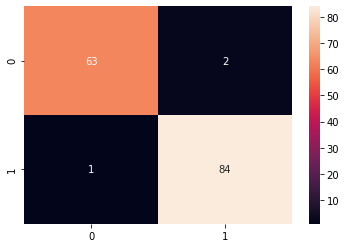

In [ ]:
### XGBoost on Reduced Features after Applying PCA
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(Train_Features_Reduced_PCA, train_labels) #For sklearn no one hot encoding


#Train the model using the training sets
model.fit(Train_Features_Reduced_PCA, train_labels)

#Predict the response for test and Validation dataset
y_pred = model.predict(Test_Features_Reduced_PCA)
val_pred =  model.predict(Val_Features_Reduced_PCA)

#Print overall accuracy
from sklearn import metrics

print ("Test Accuracy = ", metrics.accuracy_score(test_labels, y_pred))
print ("Val Accuracy = ", metrics.accuracy_score(val_labels, val_pred))


print ("Test Data:\n", classification_report(test_labels, y_pred))
print( "Validation Data:\n", classification_report(val_labels, val_pred)) 
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
#print(cm)
sns.heatmap(cm, annot=True)


# SVM on REDUCED PCA Training Features

Test Accuracy =  0.9666666666666667
Val Accuracy =  0.98
Test Data:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        65
           1       0.97      0.98      0.97        85

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Validation Data:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        51
           1       0.97      1.00      0.99        99

    accuracy                           0.98       150
   macro avg       0.99      0.97      0.98       150
weighted avg       0.98      0.98      0.98       150



<AxesSubplot:>

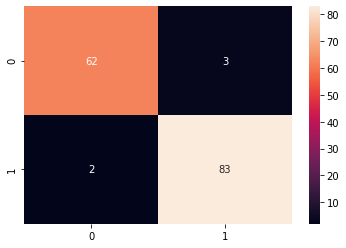

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(Train_Features_Reduced_PCA, train_labels)

#Predict the response for test and Validation dataset
y_pred = clf.predict(Test_Features_Reduced_PCA)
val_pred =  clf.predict(Val_Features_Reduced_PCA)

#Print overall accuracy
from sklearn import metrics

print ("Test Accuracy = ", metrics.accuracy_score(test_labels, y_pred))
print ("Val Accuracy = ", metrics.accuracy_score(val_labels, val_pred))


print ("Test Data:\n", classification_report(test_labels, y_pred))
print( "Validation Data:\n", classification_report(val_labels, val_pred)) 
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
#print(cm)
sns.heatmap(cm, annot=True)

# SVM ( kernel as "poly")

Test Accuracy =  0.9
Val Accuracy =  0.94
Test Data:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        65
           1       0.85      1.00      0.92        85

    accuracy                           0.90       150
   macro avg       0.93      0.88      0.89       150
weighted avg       0.92      0.90      0.90       150

Validation Data:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        51
           1       0.92      1.00      0.96        99

    accuracy                           0.94       150
   macro avg       0.96      0.91      0.93       150
weighted avg       0.94      0.94      0.94       150



<AxesSubplot:>

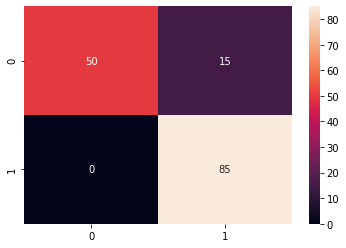

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
clf.fit(Train_Features_Reduced_PCA, train_labels)

#Predict the response for test and Validation dataset
y_pred = clf.predict(Test_Features_Reduced_PCA)
val_pred =  clf.predict(Val_Features_Reduced_PCA)

#Print overall accuracy
from sklearn import metrics

print ("Test Accuracy = ", metrics.accuracy_score(test_labels, y_pred))
print ("Val Accuracy = ", metrics.accuracy_score(val_labels, val_pred))


print ("Test Data:\n", classification_report(test_labels, y_pred))
print( "Validation Data:\n", classification_report(val_labels, val_pred)) 
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
#print(cm)
sns.heatmap(cm, annot=True)

# SVM model(rbf) On REDUCED PCA Training Features

Test Accuracy =  0.98
Val Accuracy =  0.98
Test Data:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        65
           1       0.97      1.00      0.98        85

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

Validation Data:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        51
           1       0.97      1.00      0.99        99

    accuracy                           0.98       150
   macro avg       0.99      0.97      0.98       150
weighted avg       0.98      0.98      0.98       150



<AxesSubplot:>

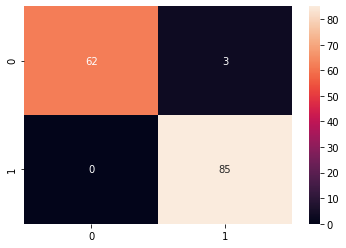

In [ ]:
#Import svm model On REDUCED PCA Training Features
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(Train_Features_Reduced_PCA, train_labels)

#Predict the response for test and Validation dataset
y_pred = clf.predict(Test_Features_Reduced_PCA)
val_pred =  clf.predict(Val_Features_Reduced_PCA)
#Print overall accuracy
from sklearn import metrics

print ("Test Accuracy = ", metrics.accuracy_score(test_labels, y_pred))
print ("Val Accuracy = ", metrics.accuracy_score(val_labels, val_pred))


print ("Test Data:\n", classification_report(test_labels, y_pred))
print( "Validation Data:\n", classification_report(val_labels, val_pred)) 
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
#print(cm)
sns.heatmap(cm, annot=True)

# SVM on ALL Training Features

Test Accuracy =  0.98
Val Accuracy =  0.98
Test Data:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        65
           1       0.97      1.00      0.98        85

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

Validation Data:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        51
           1       0.97      1.00      0.99        99

    accuracy                           0.98       150
   macro avg       0.99      0.97      0.98       150
weighted avg       0.98      0.98      0.98       150



<AxesSubplot:>

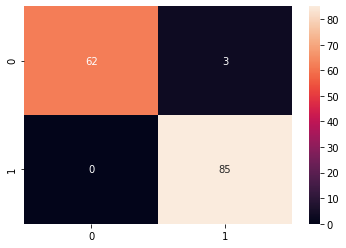

In [ ]:


#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_for_training, train_labels)

#Predict the response for test and validation dataset
y_pred = clf.predict(X_test_features)
val_pred =  clf.predict(X_val_features)


#Print overall accuracy
from sklearn import metrics

print ("Test Accuracy = ", metrics.accuracy_score(test_labels, y_pred))
print ("Val Accuracy = ", metrics.accuracy_score(val_labels, val_pred))


print ("Test Data:\n", classification_report(test_labels, y_pred))
print( "Validation Data:\n", classification_report(val_labels, val_pred)) 
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
#print(cm)
sns.heatmap(cm, annot=True)


# Random Forest on Reduced Features

Test Accuracy =  0.98
Val Accuracy =  0.9733333333333334
Test Data:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.98      0.99      0.98        85

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

Validation Data:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        51
           1       0.98      0.98      0.98        99

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



<AxesSubplot:>

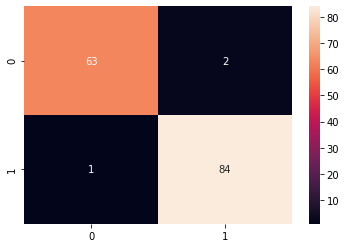

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Now predict using the trained RF model.
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
RF_model.fit(Train_Features_Reduced_PCA, train_labels) #For sklearn no one hot encoding

#Predict the response for test and Validation dataset
y_pred = RF_model.predict(Test_Features_Reduced_PCA)
val_pred =  RF_model.predict(Val_Features_Reduced_PCA)

#Print overall accuracy
from sklearn import metrics

print ("Test Accuracy = ", metrics.accuracy_score(test_labels, y_pred))
print ("Val Accuracy = ", metrics.accuracy_score(val_labels, val_pred))


print ("Test Data:\n", classification_report(test_labels, y_pred))
print( "Validation Data:\n", classification_report(val_labels, val_pred)) 
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
#print(cm)
sns.heatmap(cm, annot=True)


# XGBoost on All training Features extracted


## XGBOOST Predicting on Test Data (For ALL Features Extracted)

[11:48:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Accuracy =  0.9733333333333334
Val Accuracy =  0.9866666666666667
Test Data:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        65
           1       0.97      0.99      0.98        85

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Validation Data:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.99      0.99      0.99        99

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99     

<AxesSubplot:>

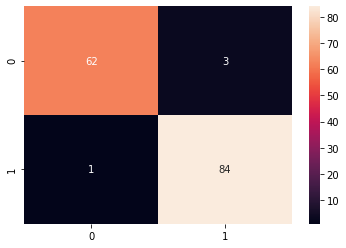

In [ ]:

import xgboost as xgb
model = xgb.XGBClassifier()
model.fit( Standarized_train_Features, train_labels) #For sklearn no one hot encoding

#Predict the response for test and Validation dataset
y_pred = model.predict(Standarized_test_features)
val_pred =  model.predict(Standarized_val_features)

#Print overall accuracy
from sklearn import metrics

print ("Test Accuracy = ", metrics.accuracy_score(test_labels, y_pred))
print ("Val Accuracy = ", metrics.accuracy_score(val_labels, val_pred))

print ("Test Data:\n", classification_report(test_labels, y_pred))
print( "Validation Data:\n", classification_report(val_labels, val_pred)) 
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
#print(cm)
sns.heatmap(cm, annot=True)


## Random Forest Predicting on Test Data (For ALL Features Extracted)

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
RF_model.fit(X_for_training, train_labels) #For sklearn no one hot encoding



RandomForestClassifier(n_estimators=50, random_state=42)

Test Accuracy =  0.9733333333333334
Val Accuracy =  0.98
Test Data:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        65
           1       0.97      0.99      0.98        85

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Validation Data:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        51
           1       0.97      1.00      0.99        99

    accuracy                           0.98       150
   macro avg       0.99      0.97      0.98       150
weighted avg       0.98      0.98      0.98       150



<AxesSubplot:>

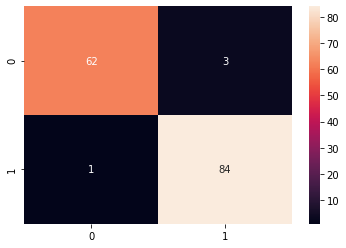

In [ ]:

#Predict the response for test and Validation dataset
y_pred = RF_model.predict(X_test_features)
val_pred =  RF_model.predict(X_val_features)

#Print overall accuracy
from sklearn import metrics

print ("Test Accuracy = ", metrics.accuracy_score(test_labels, y_pred))
print ("Val Accuracy = ", metrics.accuracy_score(val_labels, val_pred))


print ("Test Data:\n", classification_report(test_labels, y_pred))
print( "Validation Data:\n", classification_report(val_labels, val_pred)) 
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
#print(cm)
sns.heatmap(cm, annot=True)
